<a href="https://colab.research.google.com/github/bananighosh/Fall-2023-NYU-AI/blob/assignment_1_probability/CS_GY661_AI_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plot

1a. Generate an array of 10^4 with mean =7.25 and standard deviation = 0.875 that will follow normal distribution

In [11]:
gs = np.random.normal(loc=7.25, scale=0.875, size=10000)

(array([  2.,   1.,   2.,   3.,   1.,   6.,   5.,  10.,  10.,  29.,  40.,
         40.,  63., 111.,  92., 166., 196., 265., 282., 369., 435., 459.,
        486., 544., 580., 617., 602., 614., 545., 580., 432., 425., 374.,
        366., 282., 229., 191., 134., 123.,  91.,  64.,  29.,  45.,  27.,
         13.,   3.,   9.,   5.,   1.,   2.]),
 array([ 3.7692277 ,  3.90146139,  4.03369509,  4.16592878,  4.29816248,
         4.43039617,  4.56262987,  4.69486356,  4.82709725,  4.95933095,
         5.09156464,  5.22379834,  5.35603203,  5.48826573,  5.62049942,
         5.75273312,  5.88496681,  6.01720051,  6.1494342 ,  6.2816679 ,
         6.41390159,  6.54613529,  6.67836898,  6.81060268,  6.94283637,
         7.07507007,  7.20730376,  7.33953746,  7.47177115,  7.60400485,
         7.73623854,  7.86847224,  8.00070593,  8.13293962,  8.26517332,
         8.39740701,  8.52964071,  8.6618744 ,  8.7941081 ,  8.92634179,
         9.05857549,  9.19080918,  9.32304288,  9.45527657,  9.58751027,
 

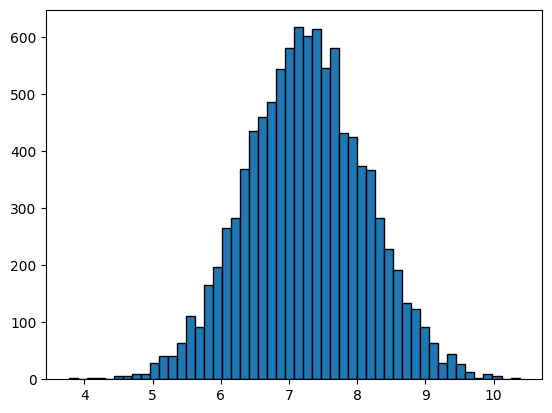

In [12]:
plot.hist(gs, bins=50, edgecolor='black')

In [14]:
sigma = np.matrix('1 0.6 -0.9; 0.6 1 -0.5; -0.9 -0.5 1')
sigma

matrix([[ 1. ,  0.6, -0.9],
        [ 0.6,  1. , -0.5],
        [-0.9, -0.5,  1. ]])